https://www.worldometers.info/demographics/life-expectancy/

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # grid custoomization

In [2]:
tab = pd.read_html("https://www.worldometers.info/demographics/life-expectancy/")

In [3]:
df = tab[0]
df.head()

,#,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,1,Hong Kong,85.83,88.66,83.00
1,2,Macao,85.51,88.11,82.88
2,3,Japan,84.95,87.97,81.91
3,4,Switzerland,84.38,86.05,82.63
4,5,Singapore,84.27,86.42,82.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #                             201 non-null    int64  
 1   Country                       201 non-null    object 
 2   Life Expectancy (both sexes)  201 non-null    float64
 3   Females Life Expectancy       201 non-null    float64
 4   Males Life Expectancy         201 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.0+ KB


In [5]:
df = df.drop(columns="#")
df.head(10)

,Country,Life Expectancy (both sexes),Females Life Expectancy,Males Life Expectancy
0,Hong Kong,85.83,88.66,83.00
1,Macao,85.51,88.11,82.88
2,Japan,84.95,87.97,81.91
3,Switzerland,84.38,86.05,82.63
4,Singapore,84.27,86.42,82.13
5,Italy,84.20,86.13,82.15
6,South Korea,84.14,87.23,80.83
7,Spain,84.05,86.68,81.35
8,Malta,83.85,85.83,81.81
9,Australia,83.73,85.56,81.89


In [6]:
df = df.rename(columns={'Life Expectancy (both sexes)': 'LE both', 'Females Life Expectancy': 'LE females', 'Males Life Expectancy': 'LE males'})

In [7]:
# Check for nulls
df.isnull().sum().sum()
# or
df.isna().sum()

0

Country       0
LE both       0
LE females    0
LE males      0
dtype: int64

In [8]:
df.head(10)

,Country,LE both,LE females,LE males
0,Hong Kong,85.83,88.66,83.00
1,Macao,85.51,88.11,82.88
2,Japan,84.95,87.97,81.91
3,Switzerland,84.38,86.05,82.63
4,Singapore,84.27,86.42,82.13
5,Italy,84.20,86.13,82.15
6,South Korea,84.14,87.23,80.83
7,Spain,84.05,86.68,81.35
8,Malta,83.85,85.83,81.81
9,Australia,83.73,85.56,81.89


Not a very good plot

In [9]:
'''
x = df['Country'][:10]
y = df['LE both'][:10]
m = df['LE males'][:10]
f = df['LE females'][:10]

fig, ax = plt.subplots(figsize=(7,4))

bar_container = ax.bar(x, sorted(y,reverse=True), yerr = f-m)

# set title, y labels
ax.set(ylabel='Years', title='Title', ylim=(50, 100))

# set values
ax.bar_label(bar_container, fmt='{:,.1f}', padding=5) # this refers to bar values, 1f means "1 decimal number"

# rotate x labels
# ax.set_xticklabels(df['Country'][:10], rotation = 90) # caauses warning
ax.tick_params(axis='x', labelrotation = 90)

plt.show();
'''

'\nx = df[\'Country\'][:10]\ny = df[\'LE both\'][:10]\nm = df[\'LE males\'][:10]\nf = df[\'LE females\'][:10]\n\nfig, ax = plt.subplots(figsize=(7,4))\n\nbar_container = ax.bar(x, sorted(y,reverse=True), yerr = f-m)\n\n# set title, y labels\nax.set(ylabel=\'Years\', title=\'Title\', ylim=(50, 100))\n\n# set values\nax.bar_label(bar_container, fmt=\'{:,.1f}\', padding=5) # this refers to bar values, 1f means "1 decimal number"\n\n# rotate x labels\n# ax.set_xticklabels(df[\'Country\'][:10], rotation = 90) # caauses warning\nax.tick_params(axis=\'x\', labelrotation = 90)\n\nplt.show();\n'

### make a copy to work with

In [10]:
df2 = df.sort_values(["LE both"], ascending=1)
df2.head()

,Country,LE both,LE females,LE males
200,Chad,53.68,55.41,52.01
199,Nigeria,53.87,54.24,53.51
198,Lesotho,54.91,57.82,52.12
197,Central African Republic,55.48,57.68,53.38
196,South Sudan,56.51,57.97,54.99


In [11]:
# check for duplicates
df2[df2.Country.isin(df2.Country[df2.Country.duplicated()])]

,Country,LE both,LE females,LE males
130,Micronesia,71.32,75.18,67.72
114,Micronesia,72.91,75.97,70.00


In [12]:
# check duplicated record, delete
df2 = df2.drop(114)
df2.loc[df2["Country"] == "Micronesia"]

,Country,LE both,LE females,LE males
130,Micronesia,71.32,75.18,67.72


In [13]:
# reset index after deleting
df2 = df2.reset_index(drop=True)
df2.head()

,Country,LE both,LE females,LE males
0,Chad,53.68,55.41,52.01
1,Nigeria,53.87,54.24,53.51
2,Lesotho,54.91,57.82,52.12
3,Central African Republic,55.48,57.68,53.38
4,South Sudan,56.51,57.97,54.99


In [14]:
# just prints the list of countries

# for i in range(len(df2)):
#     print(df2.loc[i].Country)

In [15]:
df2.iloc[114]

Country       Mauritius
LE both           75.69
LE females        78.73
LE males          72.77
Name: 114, dtype: object

In [16]:
df2.shape

(200, 4)

### Countries renaming

In [17]:
df2.loc[df2.Country == "Côte d'Ivoire", 'Country'] = "Cote d'Ivoire"
df2.loc[df2.Country == 'Czech Republic (Czechia)', 'Country'] = "Czechia"
df2.loc[df2.Country == "DR Congo", 'Country'] = "Democratic Republic of Congo"
df2.loc[df2.Country == "Sao Tome & Principe", 'Country'] = "Sao Tome and Principe"
df2.loc[df2.Country == "South Korea", 'Country'] = "Republic of Korea" 
df2.loc[df2.Country == "United States", 'Country'] = "United States of America"

In [18]:
df2[df2.Country == "Czechia"]

,Country,LE both,LE females,LE males
154,Czechia,79.82,82.58,77.02


### Brief plot to have a look

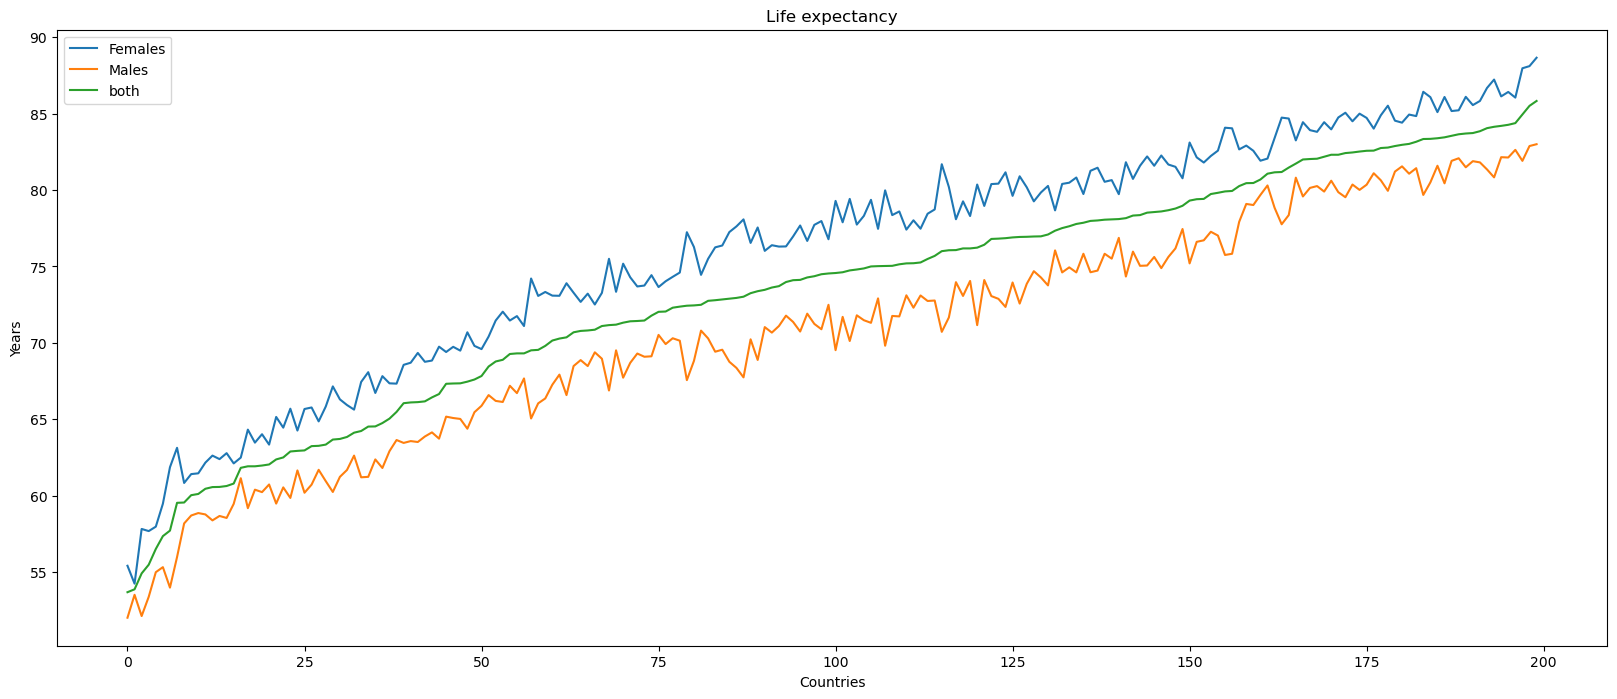

In [19]:
plt.figure(figsize = (20, 8))

plt.plot(df2['LE females'], label = "Females")
plt.plot(df2['LE males'], label = "Males")
plt.plot(df2['LE both'], label = "both")
plt.title('Life expectancy')
plt.xlabel('Countries')
plt.ylabel('Years')
plt.legend()
plt.show();

### Now building the better visual

To plot the data in Python the way the OP did that I'll be referencing these two links

BoxStyle ref:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.BoxStyle.html

https://stackoverflow.com/questions/29119092/adjust-padding-inside-matplotlib-annotation-box

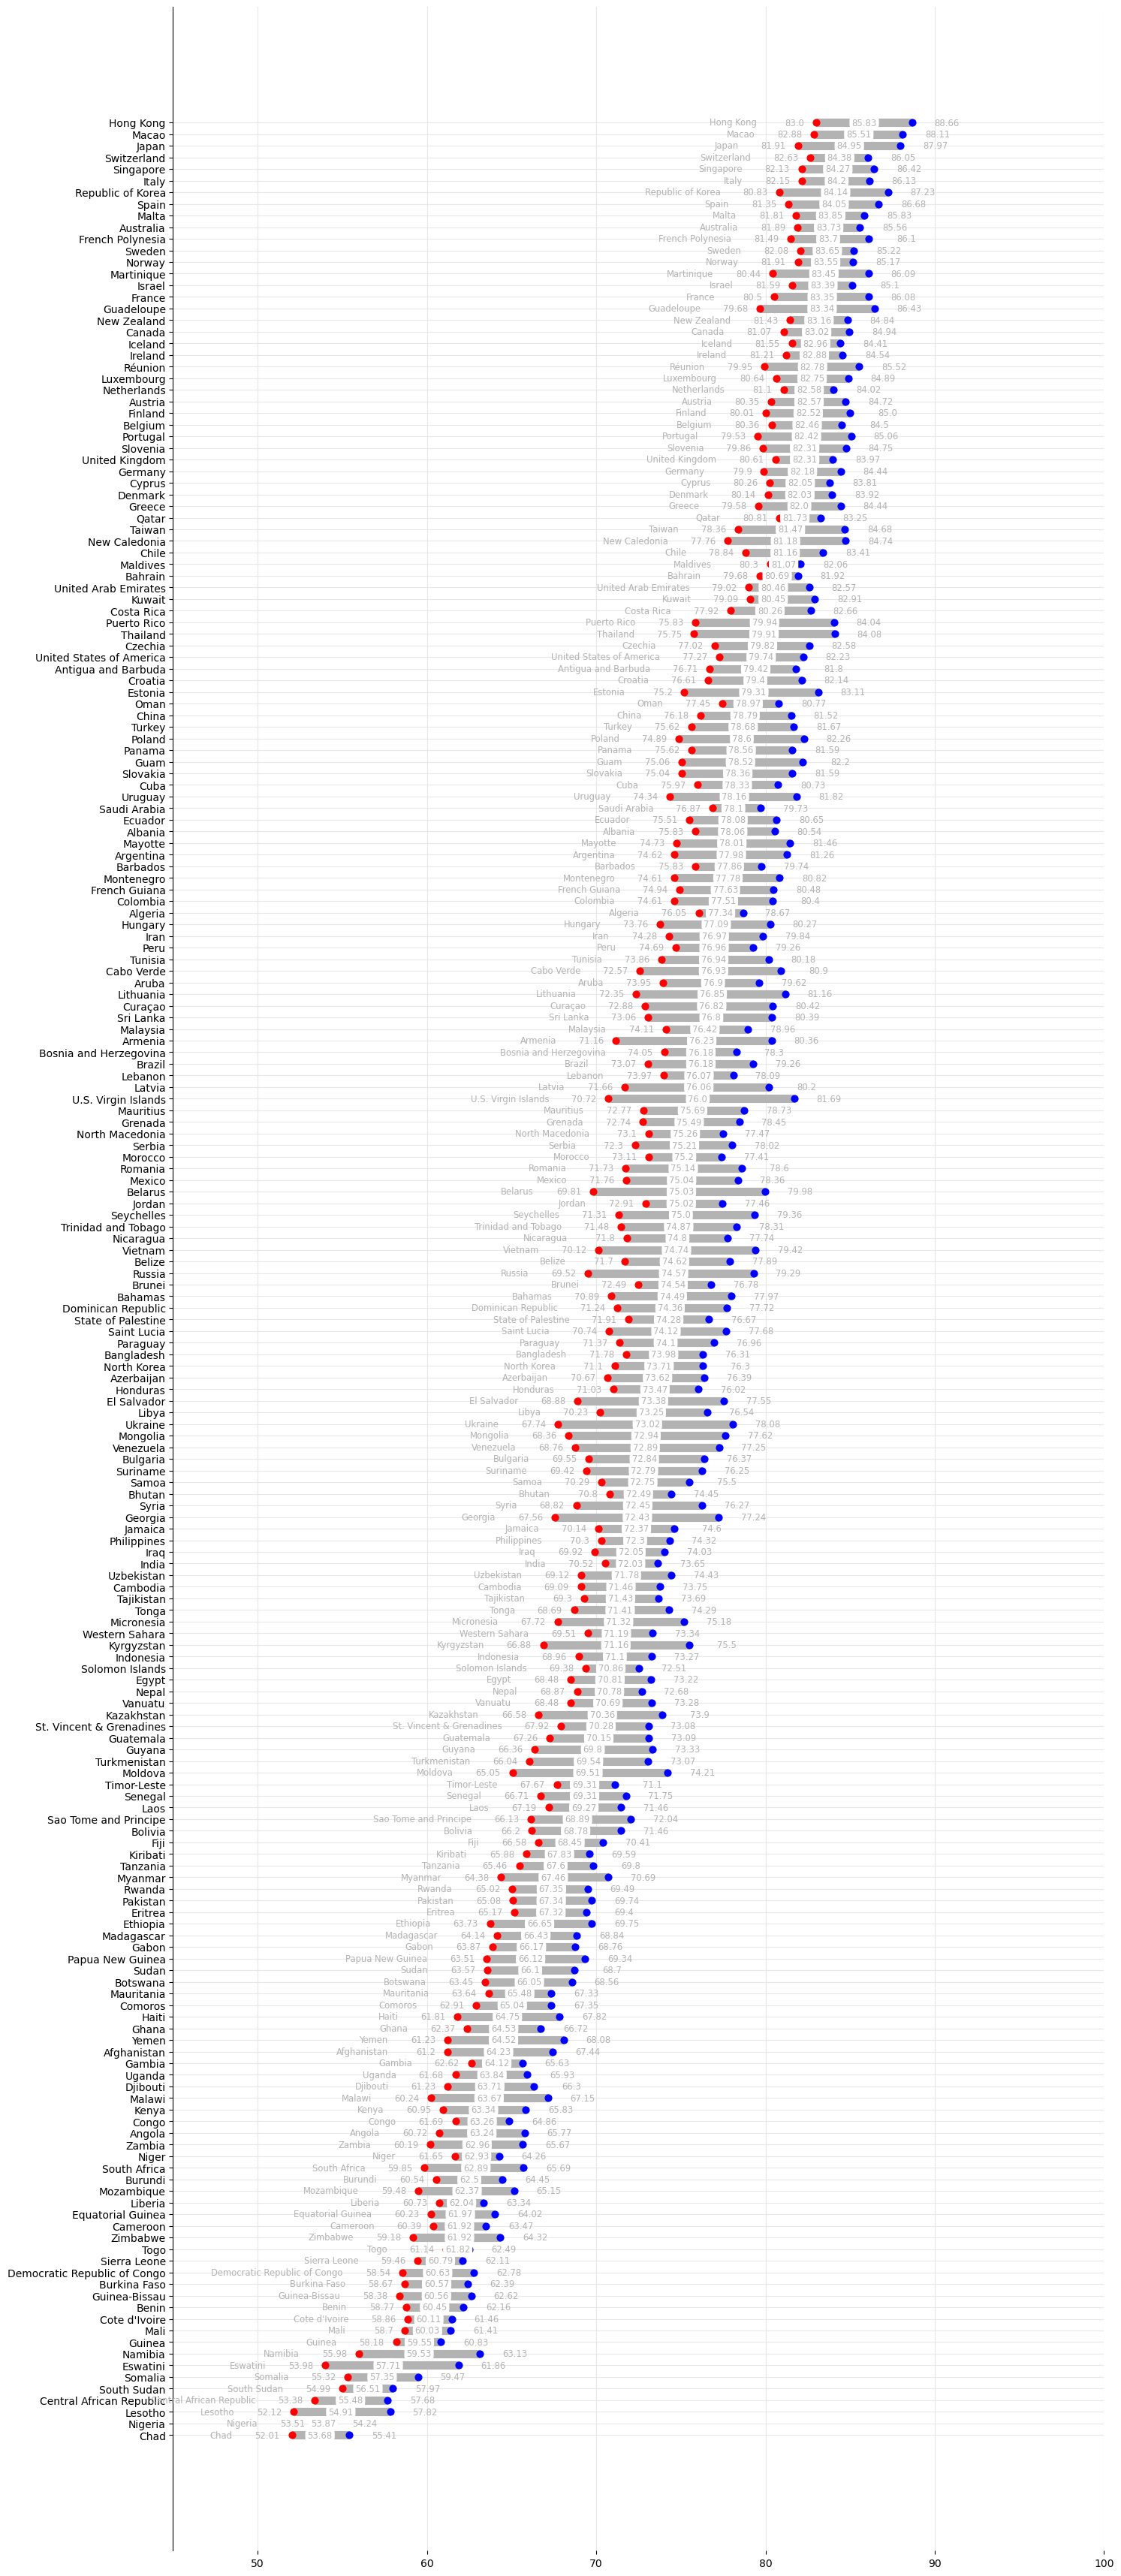

In [21]:
# this should make plots better in resolution 
plt.rcParams['figure.dpi'] = 100


fig, ax = plt.subplots(figsize=(16,44))

# draw the grid
ax.grid(which="major", axis='both', color='#e6e6e6', alpha=0.9, zorder=1)

# remove all borders except the left
ax.spines[['top','right','bottom']].set_visible(False)

# set the limits
ax.set_xlim(45, 100)

# padding regulator
space = 0.7


for i in range(len(df2)):
    
    # this draws the line from males to females
    ax.hlines(y=df2.loc[i].Country, xmin=df2.loc[i]['LE males'], xmax=df2.loc[i]['LE females'], color='#b3b3b3', zorder=2, linewidth=8, label='_nolegend_', alpha=1)
    
    # put the dots
    ax.scatter(df2.loc[i]['LE males'], df2.loc[i].Country, s=40, color='red', zorder=3)
    ax.scatter(df2.loc[i]['LE females'], df2.loc[i].Country, s=40, color='blue', zorder=3)
    ax.scatter(df2.loc[i]['LE both'], df2.loc[i].Country, s=10, color='black', zorder=3)
    
    # put the values
    ax.text(df2.loc[i]['LE males'] - space, df2.loc[i].Country, s=df2.loc[i]['LE males'], va="center", ha="right", size='small', c="#b3b3b3")
    ax.text(df2.loc[i]['LE females'] + space*4, df2.loc[i].Country, s=df2.loc[i]['LE females'], va="center", ha="right", size='small', c="#b3b3b3")
    ax.text(df2.loc[i]['LE both'], df2.loc[i].Country, s=df2.loc[i]['LE both'], va="center", ha="center", size='small', bbox=dict(boxstyle='round4,pad=0.3', fc='white', ec='none'), c="#b3b3b3")
    
    ax.text(df2.loc[i]['LE males'] - space*5, df2.loc[i].Country, s=df2.loc[i]['Country'], va="center", ha="right", size='small', c="#b3b3b3")

    # maybe draw a difference instead?
    plt.savefig('plot_fig.png')
plt.show();